<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/KIEMTRA-LeQuangChien-19146310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thư viện


In [11]:
import cv2
import sklearn
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD

# Load và xử lý data


In [12]:
with open('Nhandiencamxuc_CNN.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
x_pre = x_train

In [13]:
x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train, 4)

# Tạo model

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))

#ANN
model.add(Flatten())
model.add(Dense(64, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(4, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)     

# Compile và train

In [15]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, batch_size=64, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 4s 1s/step - loss: 2.7394 - accuracy: 0.2088
Epoch 2/100
2/2 [==============================] - 4s 1s/step - loss: 4.3147 - accuracy: 0.2308
Epoch 3/100
2/2 [==============================] - 4s 1s/step - loss: 1.4647 - accuracy: 0.2747
Epoch 4/100
2/2 [==============================] - 4s 1s/step - loss: 1.3969 - accuracy: 0.2527
Epoch 5/100
2/2 [==============================] - 4s 1s/step - loss: 1.3854 - accuracy: 0.2637
Epoch 6/100
2/2 [==============================] - 4s 1s/step - loss: 1.3854 - accuracy: 0.2967
Epoch 7/100
2/2 [==============================] - 4s 1s/step - loss: 1.3825 - accuracy: 0.3187
Epoch 8/100
2/2 [==============================] - 4s 1s/step - loss: 1.3837 - accuracy: 0.2308
Epoch 9/100
2/2 [==============================] - 4s 1s/step - loss: 1.3789 - accuracy: 0.2747
Epoch 10/100
2/2 [==============================] - 4s 1s/step - loss: 1.3706 - accuracy: 0.3407
Epoch 11/100
2/2 [==============================] -

# Vẽ đồ thị

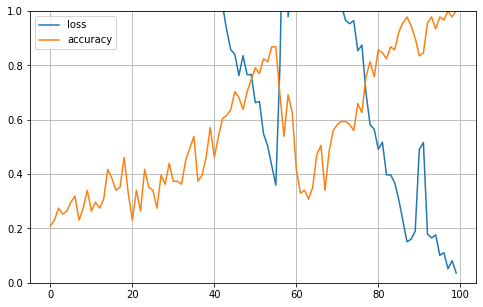

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Kiểm tra

(150, 150, 3)
[2]


'Cảm xúc hạnh phúc'

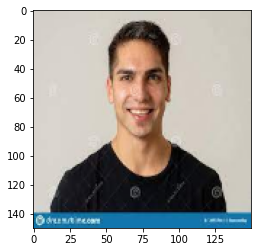

In [41]:
test = 50
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Cảm xúc buồn', 'Cảm xúc ghê tởm', 'Cảm xúc hạnh phúc', 'Cảm xúc sợ hãi']
Label[pred[0]]

[0]


'Cảm xúc buồn'

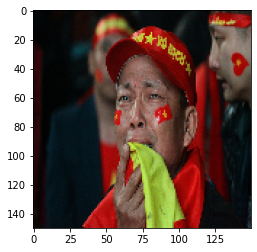

In [40]:
img = cv2.resize(cv2.imread('CDV.jpg'), (150,150))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Cảm xúc buồn', 'Cảm xúc ghê tởm', 'Cảm xúc hạnh phúc', 'Cảm xúc sợ hãi']
Label[pred[0]]

In [ ]:
#Link: https://drive.google.com/drive/folders/1ydgXSt7wIOe_moy97Mmqvb_bbA1tZukk?usp=sharing